In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Layer, RepeatVector, concatenate, Reshape, Input, Concatenate, Permute, Multiply, Add, Activation

In [2]:
# Load data
df = pd.read_csv('CTLT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,30.860001,31.260000,30.240000,30.910000,30.910000,1201700
1,2019-01-03,30.660000,30.660000,29.290001,29.840000,29.840000,1149900
2,2019-01-04,30.049999,31.360001,29.940001,31.080000,31.080000,3530400
3,2019-01-07,31.020000,32.180000,30.850000,32.000000,32.000000,1063400
4,2019-01-08,32.340000,33.060001,32.150002,32.790001,32.790001,1391000
...,...,...,...,...,...,...,...
1079,2023-04-17,46.009998,49.860001,42.529999,45.430000,45.430000,14629300
1080,2023-04-18,45.200001,45.375000,41.509998,42.080002,42.080002,10057000
1081,2023-04-19,41.419998,43.669998,41.330002,43.070000,43.070000,6744900
1082,2023-04-20,42.660000,44.410000,42.259998,44.400002,44.400002,3464300


In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

In [4]:
# Show DataFrame
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,30.860001,31.260000,30.240000,30.910000,30.910000,1201700
2019-01-03,30.660000,30.660000,29.290001,29.840000,29.840000,1149900
2019-01-04,30.049999,31.360001,29.940001,31.080000,31.080000,3530400
2019-01-07,31.020000,32.180000,30.850000,32.000000,32.000000,1063400
2019-01-08,32.340000,33.060001,32.150002,32.790001,32.790001,1391000
...,...,...,...,...,...,...
2023-04-17,46.009998,49.860001,42.529999,45.430000,45.430000,14629300
2023-04-18,45.200001,45.375000,41.509998,42.080002,42.080002,10057000
2023-04-19,41.419998,43.669998,41.330002,43.070000,43.070000,6744900


In [5]:
# Descriptive Statistical
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1.084000e+03
mean,81.386891,82.582040,80.080622,81.360083,81.360083,1.316687e+06
std,29.623591,29.926995,29.218822,29.553762,29.553762,1.607532e+06
min,30.049999,30.660000,29.290001,29.840000,29.840000,2.197000e+05
25%,52.202500,53.042000,51.707500,52.247501,52.247501,7.046750e+05
50%,83.495002,84.510002,82.259998,83.505001,83.505001,9.811000e+05
75%,106.260000,108.073750,104.765001,106.450002,106.450002,1.423700e+06
max,142.639999,142.639999,140.779999,142.350006,142.350006,3.083880e+07


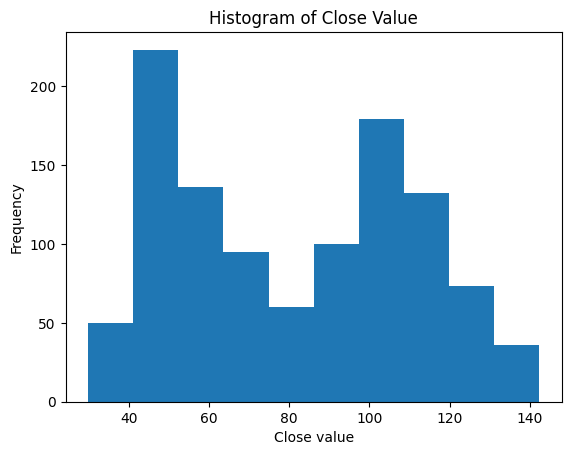

In [6]:
#  Draw a histogram
plt.hist(df['Close'])

# Set label and title
plt.xlabel('Close value')
plt.ylabel('Frequency')
plt.title('Histogram of Close Value')

# Display histogram
plt.show()

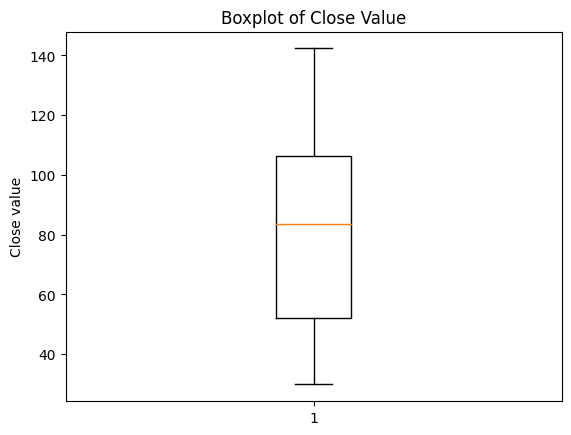

In [7]:
# Draw a boxplot
plt.boxplot(df.Close)

# Set label and title
plt.title("Boxplot of Close Value")
plt.ylabel("Close value")

# Hiển thị biểu đồ
plt.show()

In [8]:
# Select column 'Close'
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [9]:
# Standardized data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(np.array(df_Close))

In [10]:
# Split the data into train, validate, and test sets in a ratio of 6:2:2
train_size = int(len(data_scaled) * 0.6)
val_size = int(len(data_scaled) * 0.2)
test_size = len(data_scaled) - train_size - val_size

train_data = data_scaled[: train_size]
val_data = data_scaled[train_size : train_size + val_size]
test_data = data_scaled[train_size + val_size :]

In [11]:
# Create dataset
def create_dataset(data, window_size):
    windows, targets = [], []
    for i in range(len(data) - window_size - 1):
        windows.append(data[i : (i + window_size), 0])
        targets.append(data[i + window_size, 0])
    return np.array(windows), np.array(targets)

In [12]:
window_size = 60
train_windows, train_targets = create_dataset(train_data, window_size)
test_windows, test_targets = create_dataset(test_data, window_size)
val_windows, val_targets = create_dataset(val_data, window_size)

In [13]:
class AttentionLayer(Layer):
    def __init__(self, attention_dim):
        super(AttentionLayer, self).__init__()
        self.attention_dim = attention_dim

    def build(self, input_shape):
        self.W1 = Dense(units=self.attention_dim, activation='tanh')
        self.W2 = Dense(units=1, activation='linear')
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        score = self.W2(self.W1(x))
        score = Flatten()(score)
        score = Activation('softmax')(score)
        score = RepeatVector(x.shape[-1])(score)
        score = Permute([2, 1])(score)
        return Multiply()([x, score])

    def compute_output_shape(self, input_shape):
        return input_shape

In [14]:
# Build TCAN model
def build_tcan(window_size, input_dim=1, tcn_filters=64, tcn_kernel_size=2, dropout_rate=0.2, attention_dim=16):
    inputs = Input(shape=(window_size, input_dim))
    x = inputs
    x = Conv1D(filters=tcn_filters, kernel_size=tcn_kernel_size, padding='same', activation='relu')(x)
    x = SpatialDropout1D(rate=dropout_rate)(x)
    x = Conv1D(filters=tcn_filters, kernel_size=tcn_kernel_size, padding='same', activation='relu')(x)
    x = SpatialDropout1D(rate=dropout_rate)(x)

    # Additive Attention
    att = AttentionLayer(attention_dim)(x)
    max_pool_att = GlobalMaxPooling1D()(att)
    max_pool_x = GlobalMaxPooling1D()(x)
    x = concatenate([max_pool_att, max_pool_x])

    outputs = Dense(1)(x)

    model = Model(inputs=inputs, outputs=outputs)
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mean_absolute_error', optimizer=optimizer)

    return model

In [15]:
# Model building
model = build_tcan(window_size)
early_stop = EarlyStopping(monitor='val_loss', patience=5)
# Model training
history = model.fit(train_windows, train_targets, epochs=50, batch_size=32, validation_data=(val_windows, val_targets), 
                    shuffle=False, callbacks=[early_stop], verbose=1)

Epoch 1/50
19/19 [==============================] - 2s 20ms/step - loss: 0.1245 - val_loss: 0.1292
Epoch 2/50
19/19 [==============================] - 0s 9ms/step - loss: 0.1102 - val_loss: 0.0619
Epoch 3/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0735 - val_loss: 0.0569
Epoch 4/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0611 - val_loss: 0.0649
Epoch 5/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0568 - val_loss: 0.0506
Epoch 6/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0533 - val_loss: 0.0586
Epoch 7/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0559 - val_loss: 0.0707
Epoch 8/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0531 - val_loss: 0.0439
Epoch 9/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0515 - val_loss: 0.0485
Epoch 10/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0498 - val_loss: 0.0379
Epoch 11/50
19

In [16]:
# Prediction on test set
y_pred = model.predict(test_windows)

5/5 [==============================] - 0s 3ms/step


In [17]:
# Evaluate the accuracy of test
test_mae = mean_absolute_error(test_targets, y_pred)
test_mape = mean_absolute_percentage_error(test_targets, y_pred)
test_mse = mean_squared_error(test_targets, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(test_targets, y_pred)

print(f"MAE on Test set: ", test_mae)
print(f"MAPE on Test set: ", test_mape)
print(f"MSE on Test set: ", test_mse)
print(f"RMSE on Test set: ", test_rmse)
print(f"MSLE on Test set: ", test_msle)

MAE on Test set:  0.08459983462009844
MAPE on Test set:  0.5494840642303899
MSE on Test set:  0.01364520980636904
RMSE on Test set:  0.11681271252038042
MSLE on Test set:  0.008802972021939996


In [18]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 30 days
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

# Predict the closing price for the next 30 days
last_sequence_days = np.array(df_Close[-window_size:]).reshape(1, -1, 1)
y_next_30_days = []

for i in range(30):
    # Predict the next day's closing price
    next_day_pred = model.predict(last_sequence_days)
    
    # Save prediction
    y_next_30_days.append(next_day_pred[0][0])
    
    # Update data for the next day
    last_sequence_days = np.concatenate([last_sequence_days[:, 1:, :], next_day_pred.reshape(1, 1, 1)], axis=1)

1/1 [==============================] - 0s 16ms/step


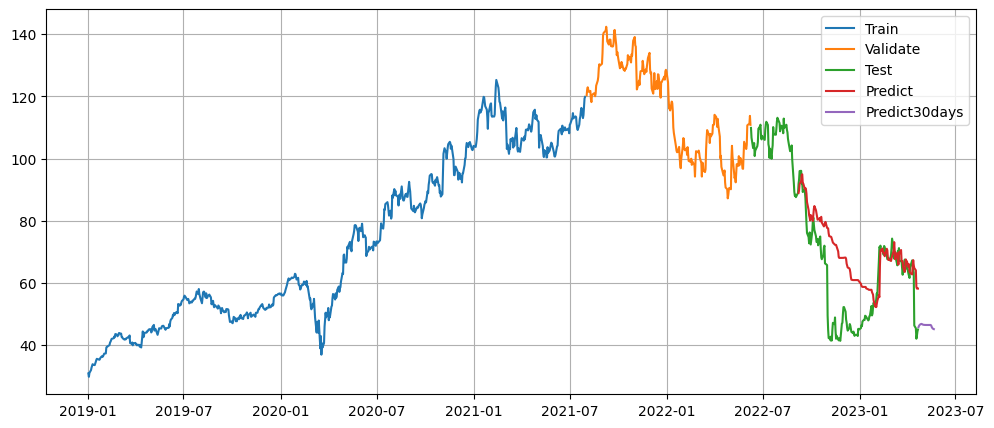

In [19]:
# Visualization
plt.figure(figsize=(12, 5))

plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

plt.plot(df.index[train_size : train_size + val_size], scaler.inverse_transform(val_data))

plt.plot(df.index[train_size + val_size : ], scaler.inverse_transform(test_data))

plt.plot(df.index[train_size + val_size + window_size + 1: ], scaler.inverse_transform(y_pred))

plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Validate', 'Test', 'Predict', 'Predict30days'])
plt.grid()
plt.savefig('IS403_TCAN_CTLT.png')
plt.show()